# Approximation of logic functions with Back Propagation

In this notebook, we are implementing Back propagation algorithm with numpy. The tasks to be done are :
- Implementation of backpropagation with **Numpy** for approximation of logic AND OR with 1 linear function and 1 non-linear activation function.
- Implementation of backpropagation with **Numpy** for approximation of logic XOR with 2 linear function and 1 non-linear activation function.
- Implementation with **Keras** for approximation of logic AND, OR and XOR.
- Create dataset for **NAND** and **XNOR** and repeat experiments with your implementation with Numpy and Keras

## Logic functions and Truth table
The AND, OR, and XOR logical functions are basic operations in digital electronics and computer programming. They are used to manipulate and evaluate binary values, which are represented as either 0 (false) or 1 (true). These logical functions are often used in combination to create more complex logical expressions.

- The AND function returns a value of 1 if and only if both of its operands are 1.

- The OR function returns a value of 1 if either of its operands is 1.

- The XOR (exclusive OR) function returns a value of 1 if one and only one of its operands is 1.


Here is a truth tablethat shows the output of a logical expression for every possible combination of input values.



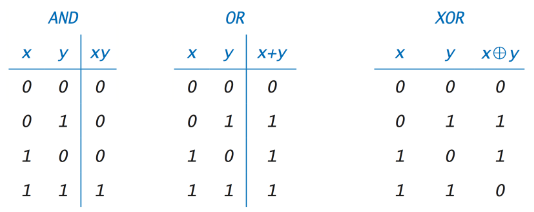

## Build Dataset

Firstly, Let us build a dataset for logic function in which the input are couple of random binary integers and their output are correponding result of logic function AND, OR, XOR.

In [9]:
import numpy as np
dataset = {}
X = np.random.randint(0, 2, (200, 2))
dataset.update({"AND": {"X":X, "y":np.array([x[0] and x[1] for x in X], dtype=int)}})
dataset.update({"OR": {"X":X, "y":np.array([x[0] or x[1] for x in X], dtype=int)}})
dataset.update({"XOR": {"X":X, "y":np.array([(x[0] and not x[1]) or (not x[0] and x[1]) for x in X], dtype=int)}})

## Solution with Least square method
Linear regression and logistic regression are two types of statistical models that are used to analyze relationships between variables. Linear regression is used for modeling the linear relationship between a dependent variable (the label) and one or more independent variables (the input). Logistic regression contains a non-linear activation function logistic (or sigmoid) for processing the output, so it can be use to modeling more complex data.  

- Linear regression : $y = wx + b$
- Logistic regerssion : $y = logistic(wx + b)$, where $logistic(x)=\frac{L}{1+e^{-k\left(x-x_0\right)}}$.

Remark that logistic is also called sigmoid if $L=1$,$k=1$ and $x_0=0$.


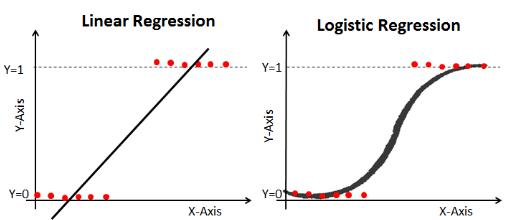

In [10]:
from sklearn.linear_model import LinearRegression, LogisticRegression

lr = LinearRegression()

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  lr.fit(input, label)
  print(f"\n--fit function {name} with Linear Regression--")
  print("coefficient [w1, w2] : ", lr.coef_,"bias b : ", lr.intercept_)
  print("coefficient of determination: ", lr.score(input, label))
  # the score in defined in this link:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


lr = LogisticRegression()

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  lr.fit(input, label)
  print(f"\n--fit function {name} with Logistic Regression--")
  print("coefficient [w1, w2] : ", lr.coef_,"bias b : ", lr.intercept_)
  print("coefficient of determination: ", lr.score(input, label))
  # the score in defined in this link:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score



--fit function AND with Linear Regression--
coefficient [w1, w2] :  [0.42270884 0.52137315] bias b :  -0.2021650990965037
coefficient of determination:  0.6626364637521847

--fit function OR with Linear Regression--
coefficient [w1, w2] :  [0.57729116 0.47862685] bias b :  0.2021650990965032
coefficient of determination:  0.7111927155764239

--fit function XOR with Linear Regression--
coefficient [w1, w2] :  [ 0.15458231 -0.0427463 ] bias b :  0.4043301981930067
coefficient of determination:  0.024829187354822757

--fit function AND with Logistic Regression--
coefficient [w1, w2] :  [[3.82708882 4.13935225]] bias b :  [-6.36152701]
coefficient of determination:  1.0

--fit function OR with Logistic Regression--
coefficient [w1, w2] :  [[4.3175401  3.99803264]] bias b :  [-1.83824154]
coefficient of determination:  1.0

--fit function XOR with Logistic Regression--
coefficient [w1, w2] :  [[ 0.5787475  -0.15864241]] bias b :  [-0.37111541]
coefficient of determination:  0.575


## Solution with Neural Network

In this notebook we are studying the application of neural network for approximation of logic functions.

A neural network is a type of machine learning model that is inspired by the structure and function of the human brain. It is made up of layers of interconnected "neurons," which process and transmit information.

The essential elements of learning a neural network are *back propagation* method that update the parameters based on the error and *chain rules* that allows us to compute gradients at each layers.

- Summary of the backpropagation algorithm:
> 1. $a^0=\mathbf{p}$,
> 2. $\mathbf{a}^{m+1}=\mathbf{f}^{m+1}\left(\mathbf{W}^{\mathbf{m}+1} \mathbf{a}^m+\mathbf{b}^{m+1}\right), \quad m=0,1, \ldots, M-1$,
> 3. $\mathbf{a}=\mathbf{a}^M$
> 4. $\mathbf{s}^M=-2 \dot{\mathbf{F}}^M\left(\mathbf{n}^M\right)(\mathbf{t}-\mathbf{a})$ and
$\mathbf{s}^m=-2 \dot{\mathbf{F}}^m(\mathbf{n})^m\left(\mathbf{W}^{m+1}\right)^T \mathbf{s}^{m+1}, \quad m=M-1, \ldots, 2,1$.
> 5. $\mathbf{W}^m(k+1)=\mathbf{W}^m(k)-\alpha \mathbf{s}^m\left(\mathbf{a}^{m-1}\right)^T$ and $\mathbf{b}^m(k+1)=\mathbf{b}^m(k)-\alpha \mathbf{s}^m$.

recall that $p$ and $t$ are input and output, $m$ is the index of layer, $k$ is the index of iteration, $\alpha$ is the learning rate, $a^m$ are the output of each layer, $s^m$ are error at each layer, $\dot{F}^m\left(n^m\right)$ are sensitivity to changes(partial derivatives), $W^m$ and $b^m$ are weights and bias of each layer.






### Solving AND and OR function with linear function and non linear activation function
- A linear function is defined as :
$$
y = W*X + b = \sum_i{w_i * x_i + b}
$$

- ReLU (rectified linear unit) activation function and Sigmoid function $σ$ are widely used in deep learning tasks.
- these non-linear activation functions and their derivatives are defined as:



$$ReLU(x) = \begin{cases}x & \text { if } x > 0 \\ 0 & \text { otherwise }\end{cases}, ReLU'(x) = \begin{cases} 1 & \text { if } x > 0 \\ 0 & \text { otherwise }\end{cases}$$

$$σ(x) = \frac{1}{1+e^{-x}}, σ'(x) = σ(x) * (1 - σ(x))$$





- let us note $Z = ReLU(Y)$ as the as the activated value of output.

- The Minimization of error function is defined as :
$$
\begin{align*}
Min_{W, b} E(y - \hat{y}) & = Min_{W, b} (y - \hat{y})^2   \\
   & = Min_{W, b} (y - f(X, W, b))^2 \\
   & = Min_{w_i, b} (y - ReLU(\sum_i{(w_i * x_i + b)}))^2
\end{align*}
$$

- Update the weight:
$$
\begin{align*}
W' & = W - \eta * \frac{\partial E}{\partial W} \\
& = W - \eta * \frac{\partial E}{\partial r}  \frac{\partial r }{\partial Z}  \frac{\partial Z}{\partial \hat{y}}  \frac{\partial \hat{y}}{\partial W} \\
& = W - \eta * 2r * (-1) * Relu'(\hat{y}) * X \\
& = W + \eta * 2r * Relu'(\hat{y}) * X
\end{align*}
$$

- Update the bias :
$$
\begin{align*}
b' & = b - \eta * \frac{\partial E}{\partial b} \\
& = b - \eta * \frac{\partial E}{\partial r}  \frac{\partial r }{\partial Z}  \frac{\partial Z}{\partial \hat{y}}  \frac{\partial \hat{y}}{\partial b} \\
& = b - \eta * 2r * (-1) * Relu'(\hat{y}) * 1 \\
& = b + \eta * 2r * Relu'(\hat{y})
\end{align*}
$$
- Remark that $ \eta$ is learning rate and r is the residual between label and output.

- Algorithm of updating the neural network:
  1. select a batch of input
  2. FeedForward pass : compute the output of neural network $ \hat{y} = ReLU(\sum_i{(w_i * x_i + b)})$
  3. Compute the Residual Error between label and output : $r = (y - \hat{y})$
  4. Backward pass : update the weight and bias.
  5. Repeat previous step until convergence of error or running out of maximum iteration.



In [11]:
import numpy as np
import matplotlib.pyplot as plt

#### AND can't be solved with only linear function

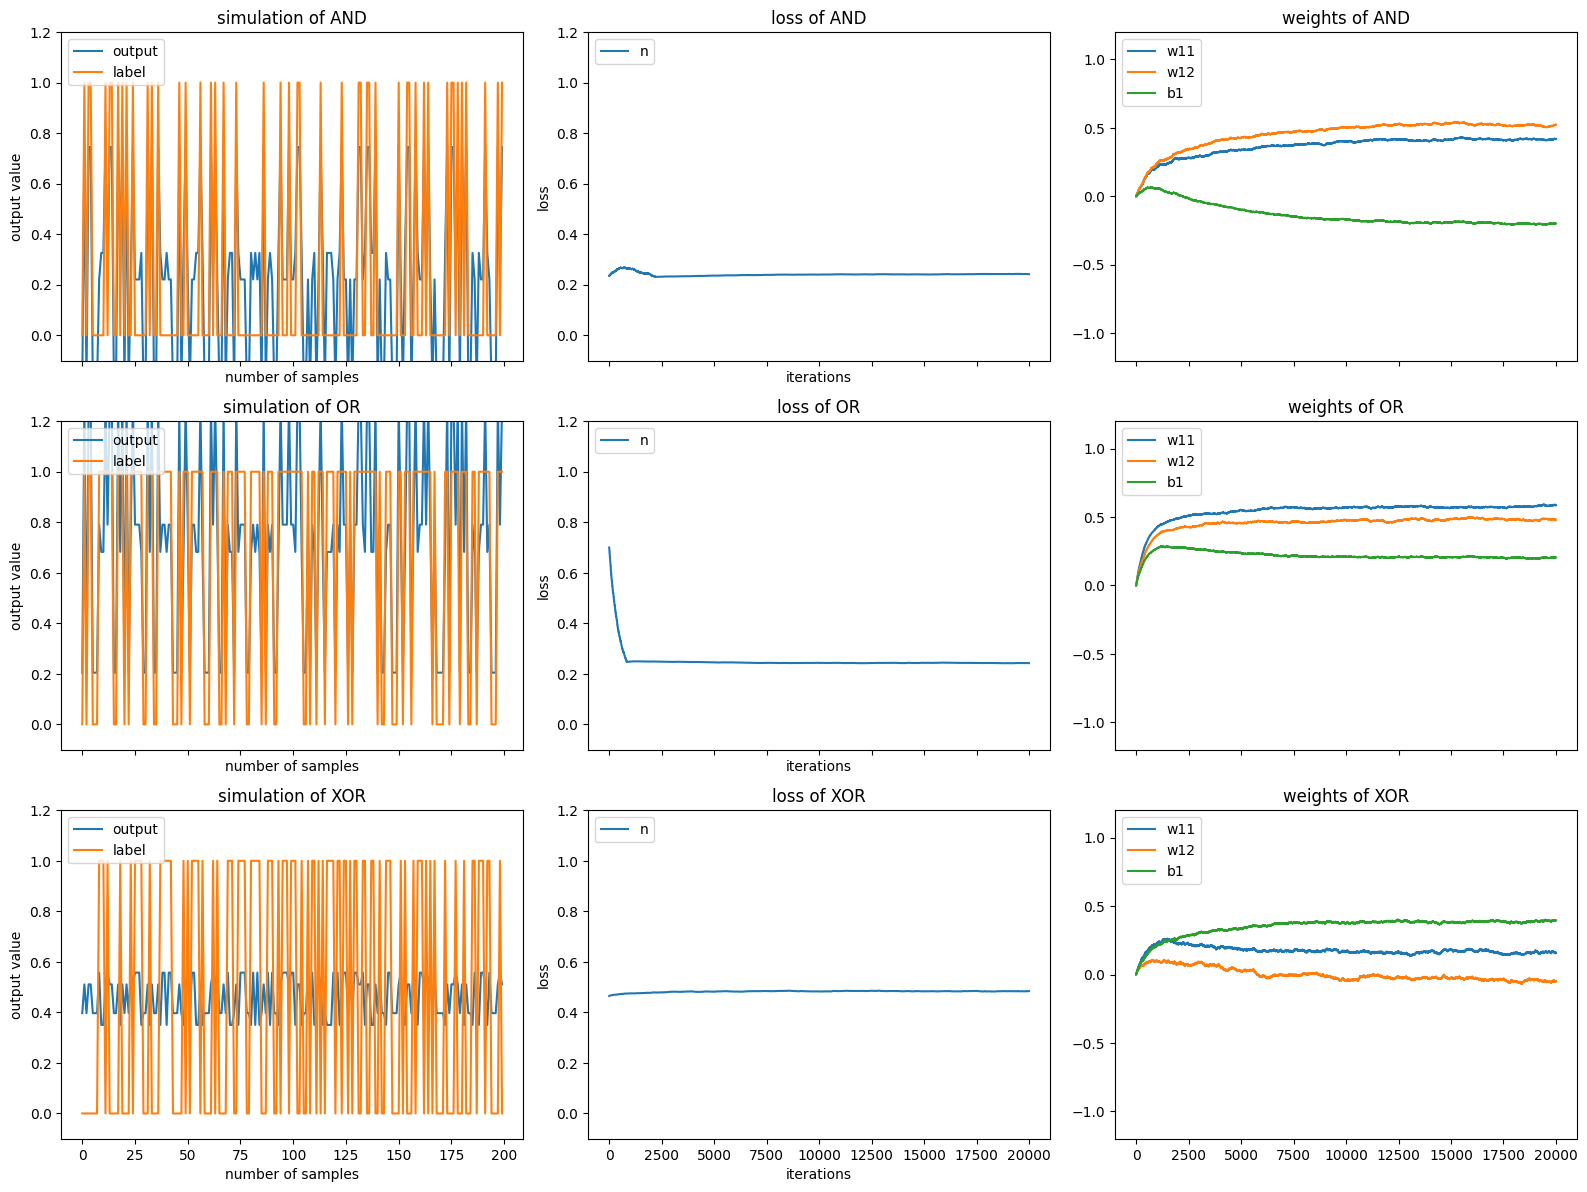

In [12]:
input = dataset["AND"]["X"]
label = dataset["AND"]["y"]

###
# N=100000 # number of iteration
# alpha = 0.0001 # learning rate
def fit_with_one_nureon_in_layer_neural_net(input, label, N=10000, alpha = 0.0001):
  w = np.array([0 , 0]) # initial values of weights
  b = np.array([0])
  output = np.zeros(len(input)) # initial value of output
  error = np.zeros(len(input)) # error between output and label
  loss = []
  w_list = []
  for i in range(N):
    j = np.random.randint(len(input)) # 1 step , random selection. choix aléatoire de l'échantillon pour le update de w
    w = w + 2 * alpha * error[j] * input[j, :] # update of weights based on gradients.
    b = b + alpha * error[j]
    output = input.dot(w) + b # 2 step. compute the output
    error = label - output # 3 calculation of error
    loss.append(abs(error).mean())
    w_list.append(np.array([w[0], w[1], b[0]]))
  return output, loss, np.array(w_list)

def plot_simulation(output, label, title=""):
  plt.plot(output)
  plt.plot(label)
  plt.legend(('output','label'),loc='upper left')
  plt.title(title)
  plt.xlabel('number of samples')
  plt.ylabel('output value')
  plt.ylim(-0.1, 1.2)

def plot_loss(loss, title=""):
  plt.plot(loss)
  plt.legend(('neural net'),loc='upper left')
  plt.title(title)
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.ylim(-0.1, 1.2)


i = 1
fig, ax = plt.subplots(len(dataset), 3, figsize=(16, 12), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss, w_list = fit_with_one_nureon_in_layer_neural_net(input, label, N=20000, alpha = 0.001)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plot_loss(loss, title="loss of " + name)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plt.plot(w_list)
  plt.legend(('w11', 'w12', 'b1'),loc='upper left')
  plt.ylim(-1.2, 1.2)
  plt.title("weights of " + name)

fig.tight_layout(pad=1.0)

#### AND and OR can be solved with one linear function and non linear activation function

In [ ]:
def relu(x):
  # derivative of relu(x) is the slope k = 1 or 0 if the value is 0
  return x * (x > 0)

def sigmoid(x):
  # derivative of sigmoid: sigmoid'(x) = x'*(1−sigmoid(x))
  return 1.0 / (1.0 + np.exp(- x))

###
# N=100000 # number of iteration
# alpha = 0.0001 # learning rate
def fit_with_one_nureon_in_layer_with_activation_neural_net(input, label, N=10000, alpha = 0.0001):
  w = np.random.normal(size=(2,), loc=0.1, scale=0.1) # initial values of weights
  b = np.random.normal(size=(1,), loc=0.1, scale=0.1)
  output = np.zeros(len(input)) # initial value of output
  error = np.zeros(len(input)) # error between output and label
  loss = []
  w_list = []
  for i in range(N):
    j = np.random.randint(len(input)) # choix aléatoire de l'échantillon pour le update de w

    #--- implementation to be done ---#

  return output, loss, w_list

def plot_simulation(output, label, title=""):
  plt.plot(output)
  plt.plot(label)
  plt.legend(('output','label'),loc='upper left')
  plt.title(title)
  plt.xlabel('number of samples')
  plt.ylabel('output value')
  plt.ylim(-0.1, 1.2)

def plot_loss(loss, title=""):
  plt.plot(loss)
  plt.legend(('neural net'),loc='upper left')
  plt.title(title)
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.ylim(-0.1, 1.2)

i = 1
fig, ax = plt.subplots(len(dataset), 3, figsize=(16, 12), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss, w_list = fit_with_one_nureon_in_layer_with_activation_neural_net(input, label, N=100000, alpha = 0.01)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plot_loss(loss, title="loss of " + name)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plt.plot(w_list)
  plt.legend(('w11', 'w12', 'b1'),loc='upper left')
  plt.title("weights of " + name)

fig.tight_layout(pad=1.0)

### Solving XOR function with 2 linear functions and non linear activation function (1 hidden layer).
- The Intermediate output is defined as: $y_1 =  W_1 X + b_1$, and the activated output in hidden layer is : $Z = Relu(y_1)$.
- The output of neural network is: $\hat{y} = W_2 Z + b_2 = W_2 (Relu( W_1 X + b_1)) + b_2 $

- Update of the weights:
$$
\begin{align*}
W_2' & = W_2 - \eta \frac{\partial E}{\partial W_2} \\
& = W_2 - \eta \frac{\partial E}{\partial r} \frac{\partial r }{\partial \hat{y}} \frac{\partial \hat{y} }{\partial W_2} \\
& = W_2 -  \eta * 2r * (-1)*Z \\
& = W_2 + \eta * 2r * Z
\end{align*}
$$
 and
$$
\begin{align*}
W_1' & = W_1- \eta * \frac{\partial E}{\partial W_1} \\
& = W_1 - \eta * \frac{\partial E}{\partial r}  \frac{\partial r }{\partial Z}  \frac{\partial Z}{\partial \hat{y_1}}  \frac{\partial \hat{y_1}}{\partial W_1} \\
& = W_1 - \eta * 2r * (-W_2) * Relu'(\hat{y_1}) * X \\
& = W_1 + \eta * 2r * W_2 * Relu'(\hat{y_1}) * X
\end{align*}
$$


- Update of the bias :
$$
\begin{align*}
b_2' & = b_2 - \eta * \frac{\partial E}{\partial b_2} \\
& = b_2 - \eta * \frac{\partial E}{\partial r} \frac{\partial r }{\partial b_2}  \\
& = b_2 -  \eta * 2r * (-1) \\
& = b_2 + \eta * 2r
\end{align*}
$$
and
$$
\begin{align*}
b_1' & = b_1- \eta * \frac{\partial E}{\partial b_1} \\
& = b_1 - \eta * \frac{\partial E}{\partial r}  \frac{\partial r }{\partial Z}  \frac{\partial Z}{\partial \hat{y_1}}  \frac{\partial \hat{y_1}}{\partial b_1} \\
& = b_1 - \eta * 2r * (-W_2) * Relu'(\hat{y_1}) * 1\\
& = b_1 + \eta * 2r * W_2 * Relu'(\hat{y_1})
\end{align*}
$$
- Remark that $ \eta$ is learning rate and r is the residual between label and output.

- Algorithm of updating the neural network:
  1. select a batch of input
  2. FeedForward pass : compute the output of neural network $ \hat{y} = W_2 (Relu( W_1 X + b_1)) + b_2$
  3. Compute the Residual Error between label and output : $r = (y - \hat{y})$
  4. Backward pass : update the weight and bias.
  5. Repeat previous step until convergence of error or running out of maximum iteration.

#### XOR can be solved with 2 linear function and 1 non-linear activation function (1 hidden layer), but the solution is not stable

In [ ]:
def relu(x):
  # derivative of relu(x) is the slope k = 1 or 0 if the value is 0
  return x * (x > 0)

###
# N=100000 # number of iteration
# n_neuron=10 # number of neuron inside a layer
# alpha = 0.0001 # learning rate
def fit_with_n_nureon_in_layer_neural_net(data, labels, n_neuron=10, N=10000, alpha = 0.0001, batch_size=3):
  w1 = np.random.normal(size=(2, n_neuron), loc=0.1, scale=0.1) # initial values of weights
  w2 = np.random.normal(size=(n_neuron, 1), loc=0.1, scale=0.1)
  b1 = np.random.normal(size=(1, n_neuron), loc=0.1, scale=0.1)
  b2 = np.random.normal(size=(1, 1), loc=0.1, scale=0.1)

  #--- implementation to be done ---#
  loss = []
  w_list = []
  for i in range(N):
    j = np.random.randint(0, len(data), batch_size) # choix aléatoire de l'échantillon pour le update de w
    input = data[j]
    label = labels[j]
    if len(label.shape)==1:
      label = label.reshape(-1,1)

    #--- implementation to be done ---#

  output_2 = []
  return output_2, loss, w_list

def plot_simulation(output, labels, title=""):
  plt.plot(output)
  plt.plot(labels)
  plt.legend(('output','labels'),loc='upper left')
  plt.title(title)
  plt.xlabel('number of samples')
  plt.ylabel('output value')
  plt.ylim(-0.1, 1.2)

def plot_loss(loss, title=""):
  plt.plot(loss)
  plt.legend(('neural net'),loc='upper left')
  plt.title(title)
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.ylim(-0.1, 1.2)

i = 1
fig, ax = plt.subplots(len(dataset), 3, figsize=(16, 12), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss, w_list = fit_with_n_nureon_in_layer_neural_net(input, label, n_neuron=3, N=100000, alpha = 0.01, batch_size=16)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plot_loss(loss, title="loss of " + name)
  plt.subplot(len(dataset), 3, i)

  i+=1
  w_list2 = np.array(w_list)
  plt.plot(w_list2[:, 0:6])
  plt.plot(w_list2[:, 6:9], linestyle='dashed')
  plt.plot(w_list2[:, 9:12], linestyle='dashdot')
  plt.plot(w_list2[:, 12:13], linestyle='dotted')
  plt.title("weights of " + name)

  plt.legend(('w1_11', 'w1_12', 'w1_21', 'w1_22', 'w1_31', 'w1_32', 'b1_1', 'b1_2', 'b1_3',
              'w2_11', 'w2_12', 'w2_13', 'b2_1'),loc='upper right')

fig.tight_layout(pad=1.0)

#### XOR can be solved with 2 linear function and 1 non-linear activation (ReLU)function (1 hidden layer) stably if we increase the number of neurons.

In [ ]:
def relu(x):
  # derivative of relu(x) is the slope k = 1 or 0 if the value is 0
  return x * (x > 0)

###
# N=100000 # number of iteration
# n_neuron=10 # number of neuron inside a layer
# alpha = 0.0001 # learning rate
def fit_with_n_nureon_in_layer_neural_net(data, labels, n_neuron=10, N=10000, alpha = 0.0001, batch_size=3):
  w1 = np.random.normal(size=(2, n_neuron)) # initial values of weights
  w2 = np.random.normal(size=(n_neuron, 1))
  b1 = np.random.normal(size=(1, n_neuron))
  b2 = np.random.normal(size=(1, 1))

  #--- implementation to be done ---#

  loss = []
  w_list = []
  for i in range(N):
    j = np.random.randint(0, len(data), batch_size) # choix aléatoire de l'échantillon pour le update de w
    input = data[j]
    label = labels[j]

    if len(label.shape)==1:
      label = label.reshape(-1,1)
    #--- implementation to be done ---#

  output_2 = []
  return output_2, loss, w_list

def plot_simulation(output, labels, title=""):
  plt.plot(output)
  plt.plot(labels)
  plt.legend(('output','labels'),loc='upper left')
  plt.title(title)
  plt.xlabel('number of samples')
  plt.ylabel('output value')
  plt.ylim(-0.1, 1.2)

def plot_loss(loss, title=""):
  plt.plot(loss)
  plt.legend(('neural net'),loc='upper left')
  plt.title(title)
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.ylim(-0.1, 1.2)

i = 1
fig, ax = plt.subplots(len(dataset), 2, figsize=(16, 12), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss, w_list = fit_with_n_nureon_in_layer_neural_net(input, label, n_neuron=100, N=10000, alpha = 0.00005, batch_size=16)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_loss(loss, title="loss of " + name)

fig.tight_layout(pad=1.0)

## Solution with Keras

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

### Solving with keras (1 neuron without non linear activation)

7/7 [==============================] - 0s 2ms/step


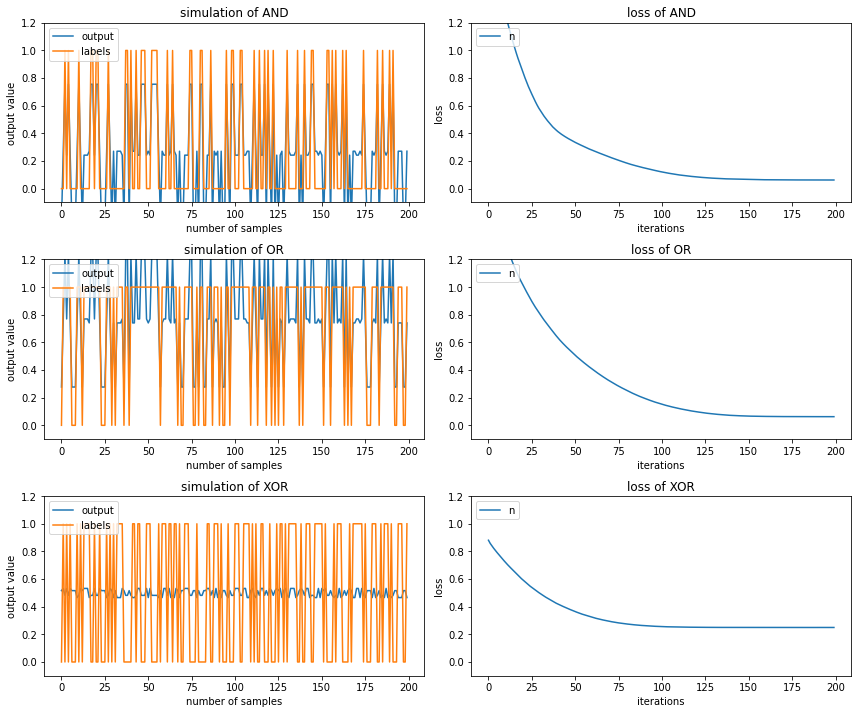

In [ ]:
def fit_with_keras(input, label, n_neuron=3, N=20000, alpha = 0.0001, batch_size=16):
  model=Sequential()
  model.add(layers.Dense(n_neuron, activation='linear', input_shape=(2,)))
  opt = optimizers.RMSprop(learning_rate=0.001)
  model.compile(opt,loss='mse',metrics=['mse'])

  history=model.fit(input, label, batch_size=batch_size,epochs=N, verbose=0)

  output = model.predict(input)
  loss = history.history["loss"]
  return output, loss
i = 1
fig, ax = plt.subplots(len(dataset), 2, figsize=(12, 10), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss = fit_with_keras(input, label, n_neuron=1, N=200, alpha = 0.0001, batch_size=16)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_loss(loss, title="loss of " + name)

fig.tight_layout(pad=1.0)

### Solving with keras (1 neuron with non linear activation : relu)

In [ ]:
def fit_with_keras(input, label, n_neuron=3, N=20000, alpha = 0.0001, batch_size=16):
  #--- implementation to be done ---#
  output = ...
  loss = ...
  return output, loss
i = 1
fig, ax = plt.subplots(len(dataset), 2, figsize=(12, 10), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss = fit_with_keras(input, label, n_neuron=1, N=200, alpha = 0.00001, batch_size=16)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_loss(loss, title="loss of " + name)

fig.tight_layout(pad=1.0)

### Solving with keras (3 neuron with non linear activation: relu)

In [ ]:
def fit_with_keras(input, label, n_neuron=3, N=20000, alpha = 0.0001, batch_size=16):
  #--- implementation to be done ---#
  output = ...
  loss = ...
  return output, loss
i = 1
fig, ax = plt.subplots(len(dataset), 2, figsize=(12, 10), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss = fit_with_keras(input, label, n_neuron=3, N=200, alpha = 0.0001, batch_size=16)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_loss(loss, title="loss of " + name)

fig.tight_layout(pad=1.0)

### Solving with keras (50 neuron with non linear activation: relu)

In [ ]:
def fit_with_keras(input, label, n_neuron=3, N=20000, alpha = 0.0001, batch_size=16):
  #--- implementation to be done ---#
  output = ...
  loss = ...
  return output, loss
i = 1
fig, ax = plt.subplots(len(dataset), 2, figsize=(12, 10), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss = fit_with_keras(input, label, n_neuron=50, N=200, alpha = 0.0001, batch_size=16)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_loss(loss, title="loss of " + name)

fig.tight_layout(pad=1.0)

## Experiments of NAND and XNOR with Numpy implementation and Keras implementation

In [ ]:
import numpy as np
dataset = {}
X = np.random.randint(0, 2, (200, 2))
# create your dataset for NAND and XNOR


In [ ]:
def relu(x):
  # derivative of relu(x) is the slope k = 1 or 0 if the value is 0
  return x * (x > 0)

###
# N=100000 # number of iteration
# n_neuron=10 # number of neuron inside a layer
# alpha = 0.0001 # learning rate

def fit_with_n_nureon_in_layer_neural_net(data, labels, n_neuron=10, N=10000, alpha = 0.0001, batch_size=3):





  # your implementation




  return output_2, loss, w_list

def plot_simulation(output, labels, title=""):
  plt.plot(output)
  plt.plot(labels)
  plt.legend(('output','labels'),loc='upper left')
  plt.title(title)
  plt.xlabel('number of samples')
  plt.ylabel('output value')
  plt.ylim(-0.1, 1.2)

def plot_loss(loss, title=""):
  plt.plot(loss)
  plt.legend(('neural net'),loc='upper left')
  plt.title(title)
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.ylim(-0.1, 1.2)

i = 1
fig, ax = plt.subplots(len(dataset), 3, figsize=(16, 4 * len(dataset)), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss, w_list = fit_with_n_nureon_in_layer_neural_net(input, label, n_neuron=3, N=100000, alpha = 0.01, batch_size=16)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 3, i)
  i+=1
  plot_loss(loss, title="loss of " + name)
  plt.subplot(len(dataset), 3, i)

  i+=1
  w_list2 = np.array(w_list)
  plt.plot(w_list2[:, 0:6])
  plt.plot(w_list2[:, 6:9], linestyle='dashed')
  plt.plot(w_list2[:, 9:12], linestyle='dashdot')
  plt.plot(w_list2[:, 12:13], linestyle='dotted')
  plt.title("weights of " + name)

  plt.legend(('w1_11', 'w1_12', 'w1_21', 'w1_22', 'w1_31', 'w1_32', 'b1_1', 'b1_2', 'b1_3',
              'w2_11', 'w2_12', 'w2_13', 'b2_1'),loc='upper right')

fig.tight_layout(pad=1.0)

In [ ]:
def fit_with_keras(input, label, n_neuron=3, N=20000, alpha = 0.0001, batch_size=16):





  # your implementation





  return output, loss
i = 1
fig, ax = plt.subplots(len(dataset), 2, figsize=(16, 4 * len(dataset)), sharex="col")

for name, ds in dataset.items():
  input = dataset[name]["X"]
  label = dataset[name]["y"]
  output, loss = fit_with_keras(input, label, n_neuron=50, N=200, alpha = 0.0001, batch_size=16)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_simulation(output, label, title="simulation of " + name)
  plt.subplot(len(dataset), 2, i)
  i+=1
  plot_loss(loss, title="loss of " + name)

fig.tight_layout(pad=1.0)